In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

%matplotlib inline

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

In [4]:
from itertools import chain
from math import ceil

def get_t(n):
    return 't({0})'.format(n), sts.t(n)

def get_chi2(k):
    return 'chi2({0})'.format(k), sts.chi2(k)

def get_expon(lam):
    return 'expon({0})'.format(lam), sts.expon(scale=lam)

def get_laplace(a):
    return 'laplace({0})'.format(a), sts.laplace(scale=a)

key, rv = get_t(2.)
students = map(get_t, [1.0, 2.0, 3.0, 5.0])
chi2s = map(get_chi2, [1.5, 2.0, 4.0, 10.0,])
expons = map(get_expon, [1.0])
laplaces = map(get_laplace, [1.0])

rvs = list(chain(students, chi2s, expons, laplaces))
plot_cols = 4
plot_rows = ceil(len(rvs) / plot_cols)

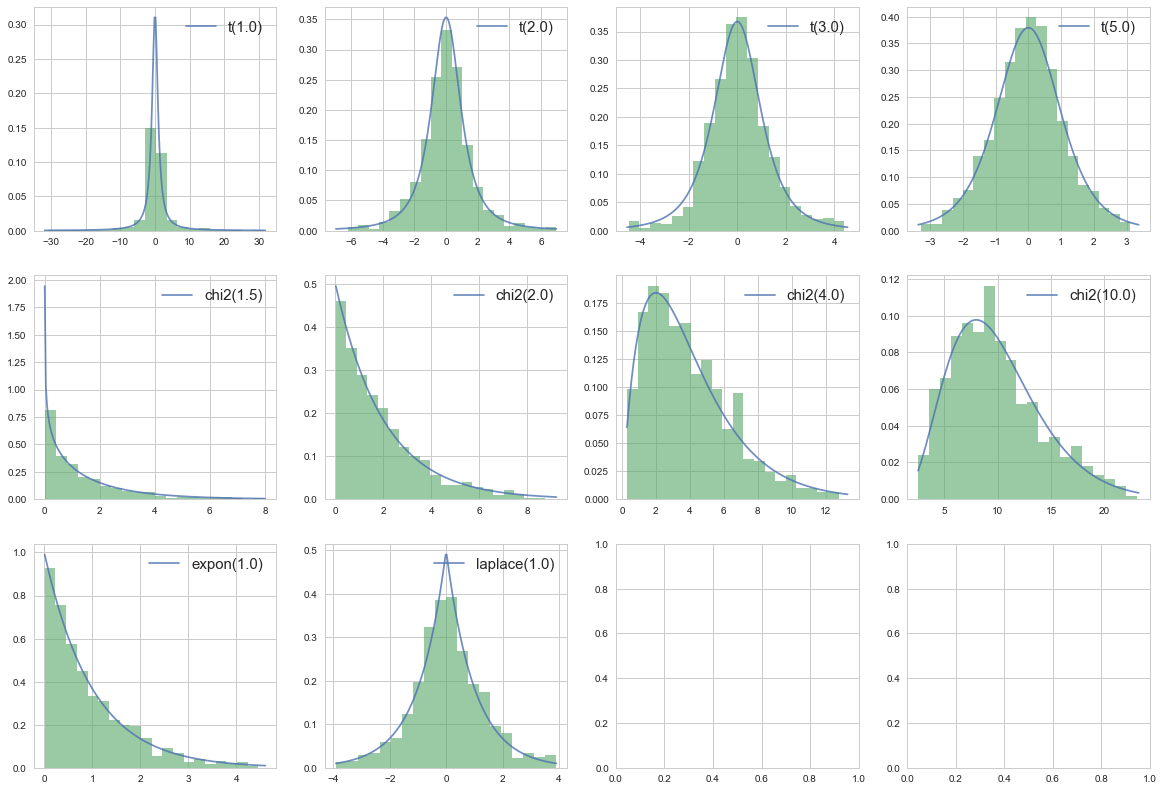

In [5]:
def plot(legend, rv, ax):
    left = rv.ppf(0.01)
    right = rv.ppf(0.99)
    sample_count = 1000
    bins = 20

    xs = np.linspace(left, right, 200)
    y_pdf = rv.pdf(xs)
    y_rvs = np.array([x for x in rv.rvs(sample_count) if x >= left and x <= right])

    _ = ax.plot(xs, y_pdf, label=legend, alpha=0.8)
    ax.legend(loc='upper right', prop={'size': 15})
    _ = ax.hist(y_rvs, bins=bins, density=True, alpha=0.6)
    

fig, axes = plt.subplots(plot_rows, plot_cols, )

for ind, p in enumerate(rvs):
    legend, rv = p
    plot(legend, rv, axes[ind // plot_cols, ind % plot_cols])
    
fig.set_size_inches(20., 14.)

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. __Обратите внимание__: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

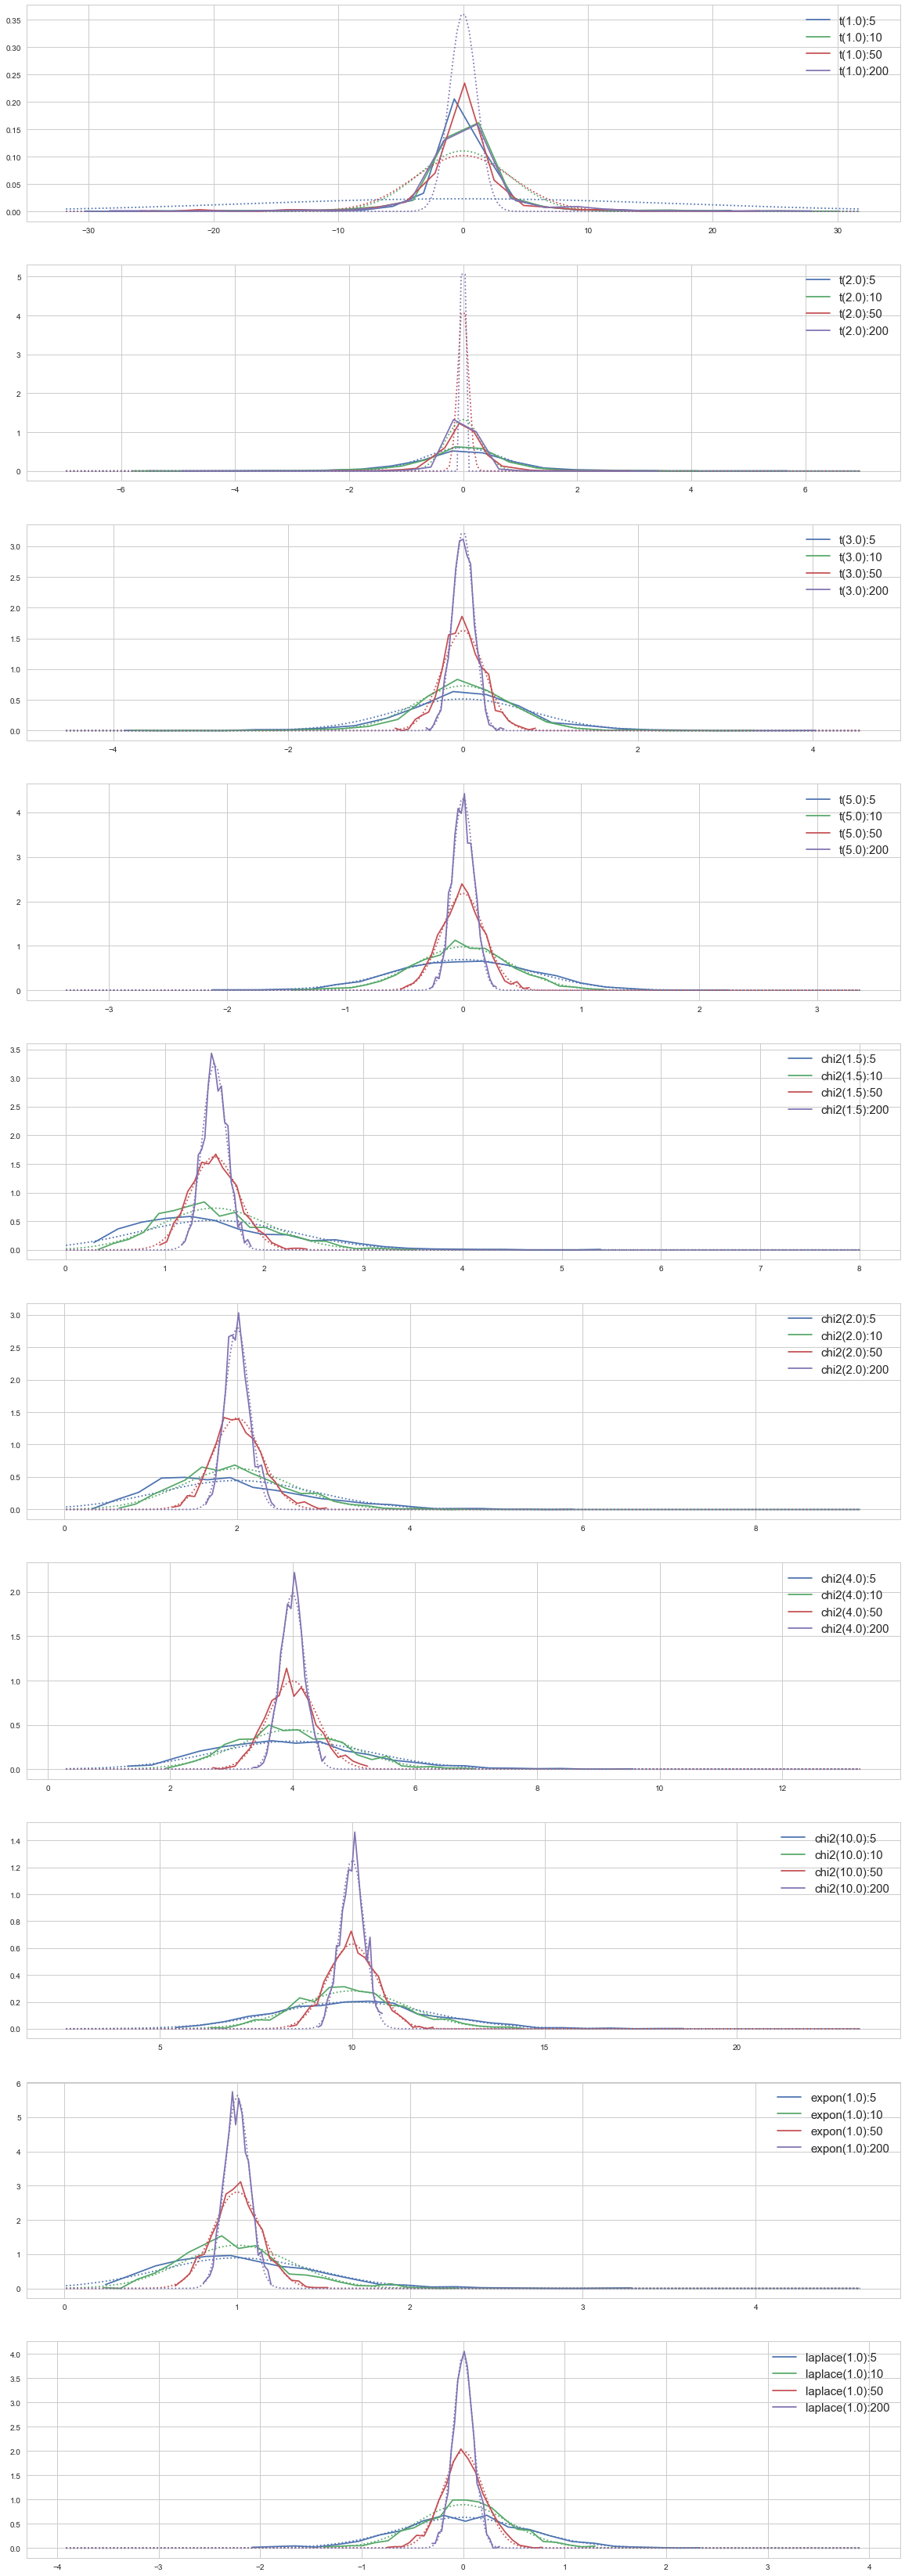

In [31]:
from math import sqrt

def gen_sample(n, rv, left, right):
    return [x for x in rv.rvs(n) if x >= left and x <= right]

def run_sampler(rv, n, ax, legend, color):
    left = rv.ppf(0.01)
    right = rv.ppf(0.99)
    
    means = [np.mean(rv.rvs(n)) for _ in range(epochs)]
    mean = rv.mean() if np.isfinite(rv.mean()) else np.mean(means)
    std = rv.std() if np.isfinite(rv.std()) else np.std(means)
    
    means = [x for x in means if x >= left and x <= right]
    ys, bin_edges = np.histogram(means, bins=22, density=True)    
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    ax.plot(bin_centers, ys, '-', label=legend + ':{0}'.format(n), color=color)
    ax.legend(loc='upper right', prop={'size': 15})
    
    xs = np.linspace(left, right, 200)
    ys = sts.norm(mean, std/sqrt(n)).pdf(xs)
    ax.plot(xs, ys, ':', color=color)

def test_rv(rv, ax, legend, palette):
    for i, n in enumerate(ns):
        run_sampler(rv, n, ax, legend, palette[i])
    
    
ns = [5, 10, 50, 200]
epochs = 1000
plot_cols = 1
plot_rows = ceil(len(rvs) / plot_cols)
fig, axes = plt.subplots(plot_rows, plot_cols)
palette = sns.color_palette()

for ind, p in enumerate(rvs):
    legend, rv = p
    test_rv(rv, axes[ind // plot_cols], legend, palette) #, ind % plot_cols
    
fig.set_size_inches(20., 60.)

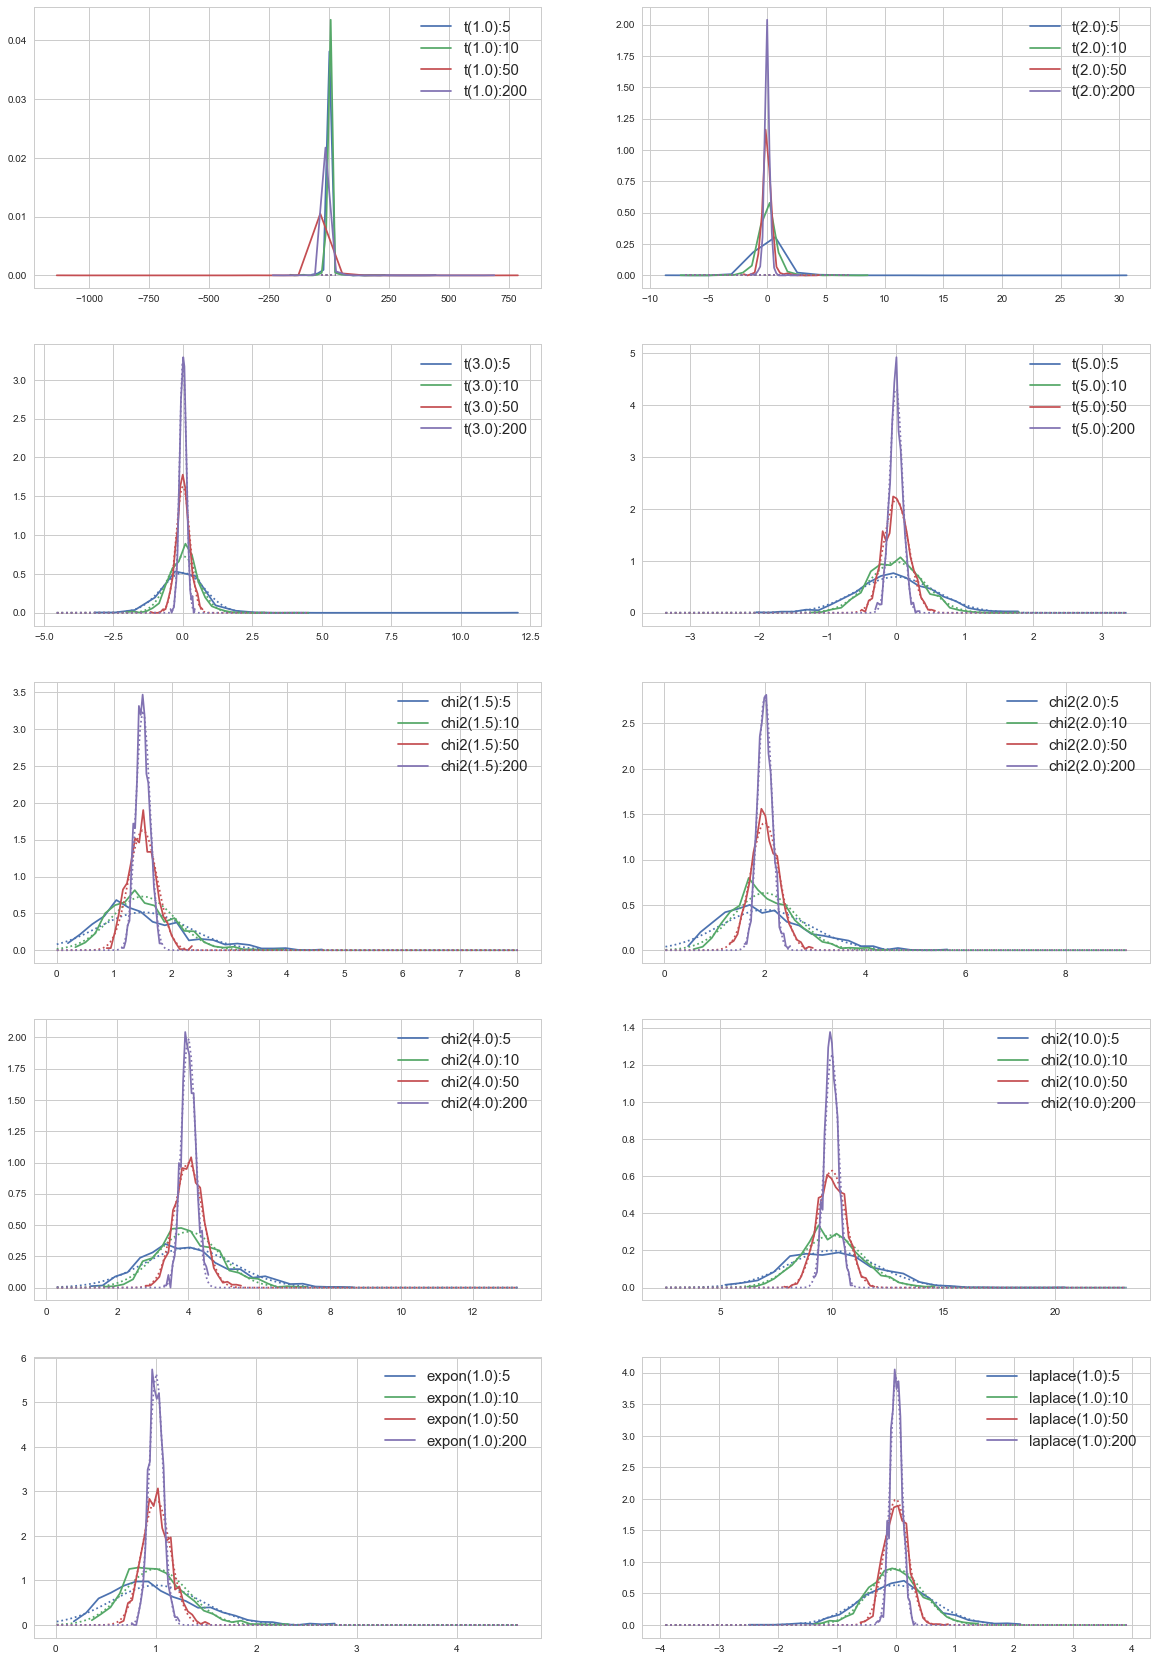

In [36]:
from math import sqrt

def run_sampler(rv, n, ax, legend, color):
    left = rv.ppf(0.01)
    right = rv.ppf(0.99)
    
    means = [np.mean(rv.rvs(n)) for _ in range(epochs)]
    #means = [x for x in means if x >= left and x <= right]
    ys, bin_edges = np.histogram(means, bins=22, density=True)    
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    ax.plot(bin_centers, ys, '-', label=legend + ':{0}'.format(n), color=color)
    ax.legend(loc='upper right', prop={'size': 15})
    
    mean = rv.mean()
    std = rv.std()
    xs = np.linspace(left, right, 200)
    ys = sts.norm(mean, std/sqrt(n)).pdf(xs)
    ax.plot(xs, ys, ':', color=color)

def test_rv(rv, ax, legend, palette):
    for i, n in enumerate(ns):
        run_sampler(rv, n, ax, legend, palette[i])
    
    
ns = [5, 10, 50, 200]
epochs = 1000
plot_cols = 2
plot_rows = ceil(len(rvs) / plot_cols)
fig, axes = plt.subplots(plot_rows, plot_cols)
palette = sns.color_palette()

for ind, p in enumerate(rvs):
    legend, rv = p
    test_rv(rv, axes[ind // plot_cols, ind % plot_cols], legend, palette)
    
fig.set_size_inches(20., 30.)